In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
df = pd.read_csv("./dataset/student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### disired features
-	studytime: Weekly study time (1 - &lt;2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, 4 - >10 hours)
-	failures: Number of past class failures
-	absences: Number of school absences
-	G1: First period grade
- G2: Second period grade


In [16]:
features = ['studytime', 'failures', 'absences','G1']
features_to_plot =['G2', 'G3']
label = 'G3'

In [6]:
data = df[features]

In [7]:
data.head()

,studytime,failures,absences,G1
0,2,0,6,5
1,2,0,4,5
2,2,3,10,7
3,3,0,2,15
4,2,0,4,6


In [8]:
data.shape

(395, 4)

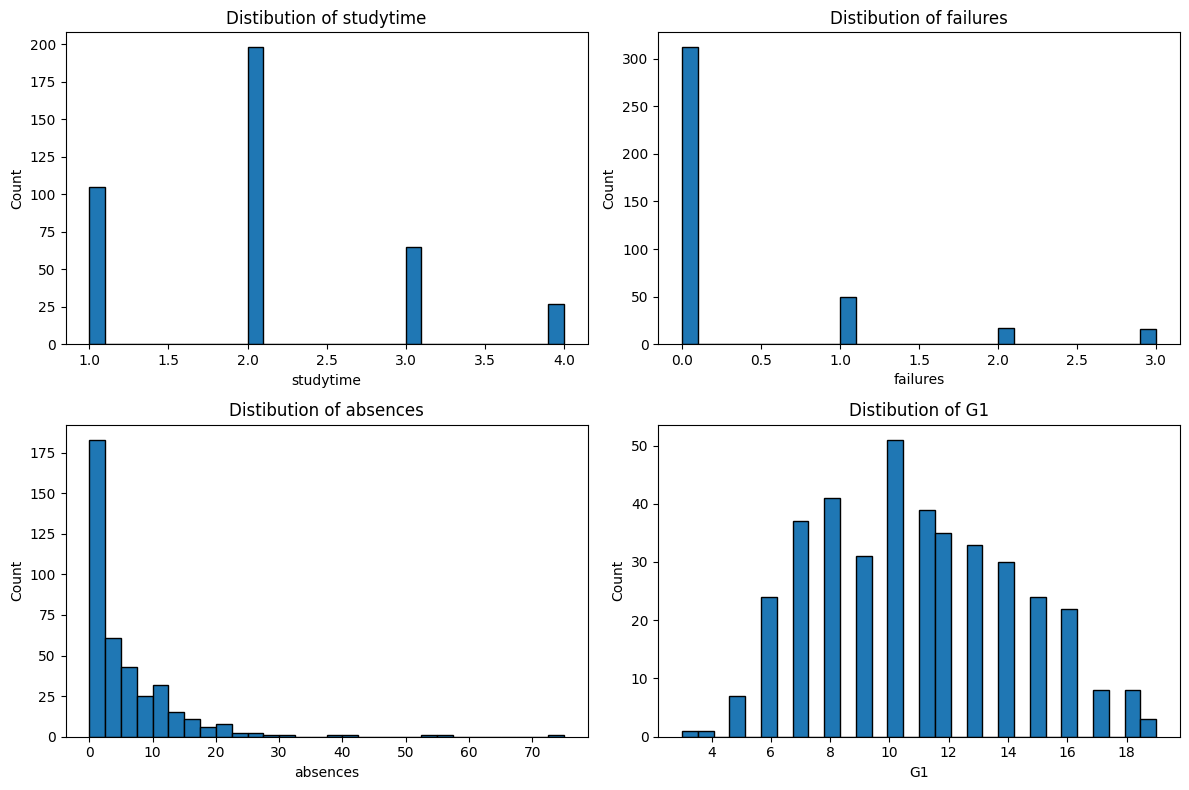

In [9]:
plt.figure(figsize=(12,8))
for i, col in enumerate(features, start=1):
    plt.subplot(2,2,i)
    plt.hist(df[col].dropna(),bins=30,edgecolor='k')
    plt.title(f"Distibution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

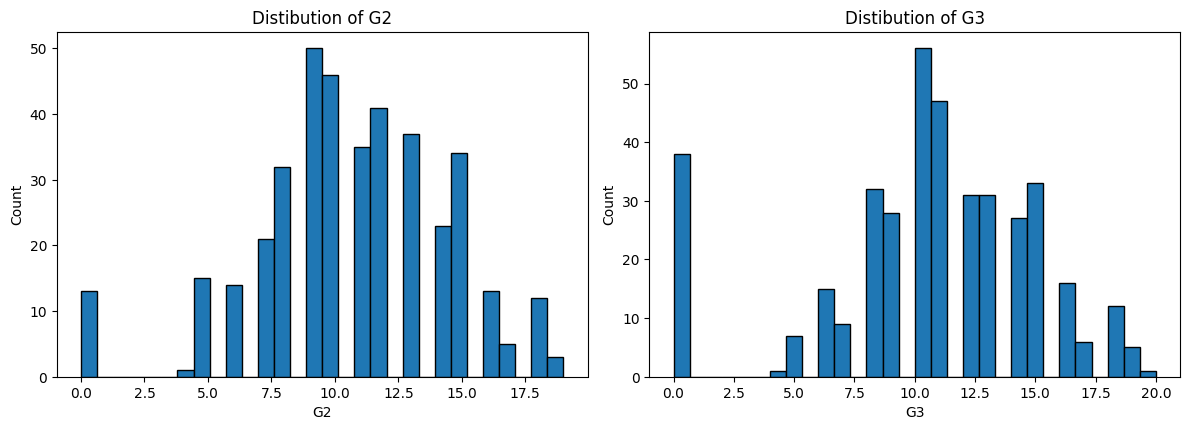

In [10]:
plt.figure(figsize=(12,8))
for i, col in enumerate(features_to_plot, start=1):
    plt.subplot(2,2,i)
    plt.hist(df[col].dropna(),bins=30,edgecolor='k')
    plt.title(f"Distibution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [11]:
feature_to_compare = ['studytime','failures','absences']

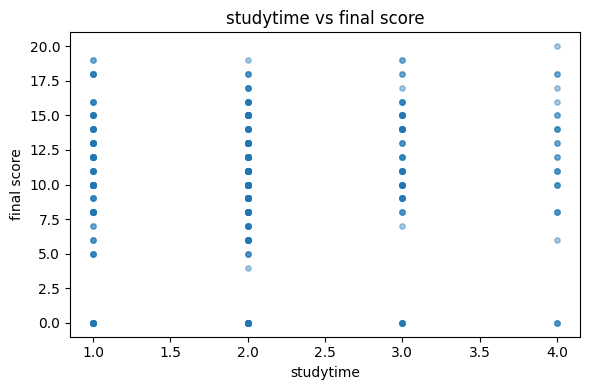

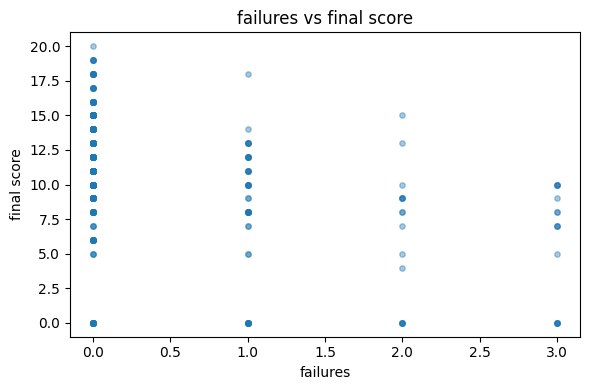

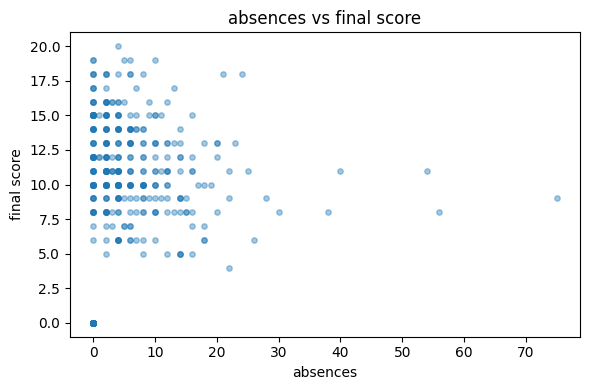

In [12]:
for i in feature_to_compare:
    plt.figure(figsize=(6,4))
    plt.scatter(df[i].dropna(),df['G3'].dropna(), alpha=0.4, s=15)
    plt.title(f"{i} vs final score")
    plt.xlabel(i)
    plt.ylabel("final score")
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.preprocessing import StandardScaler


In [17]:
full_features = ['studytime', 'failures', 'absences','G1','G2']
X = df[full_features]
y = df[label].apply(lambda grade:1 if grade >= 10 else 0)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
print("\nShape of our training features:", X_train.shape)
print("A sample from the scaled training data:\n", X_train[0])


Shape of our training features: (316, 5)
A sample from the scaled training data:
 [-0.05685286 -0.45674383 -0.46440769  0.33205033  0.62616324]


In [21]:
model = Sequential([
    Dense(units=32,activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model.compile(optimizer= "Adam", loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

d:\Rhodrick\Machine Learning\student perfomance\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\nStarting model training...")
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=1  
)

print("\nTraining finished!")


Starting model training...
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4822 - loss: 0.7491 - val_accuracy: 0.5823 - val_loss: 0.7007
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6493 - loss: 0.6888 - val_accuracy: 0.8228 - val_loss: 0.6446
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8415 - loss: 0.6423 - val_accuracy: 0.9114 - val_loss: 0.5937
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8674 - loss: 0.5928 - val_accuracy: 0.8861 - val_loss: 0.5462
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8824 - loss: 0.5590 - val_accuracy: 0.8861 - val_loss: 0.5020
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8819 - loss: 0.5111 - val_accuracy: 0.8861 - val_loss: 0.4600
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8958 - loss: 0.4772 - val_accuracy: 0.8861 - val_loss: 0.4217
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9013 - los

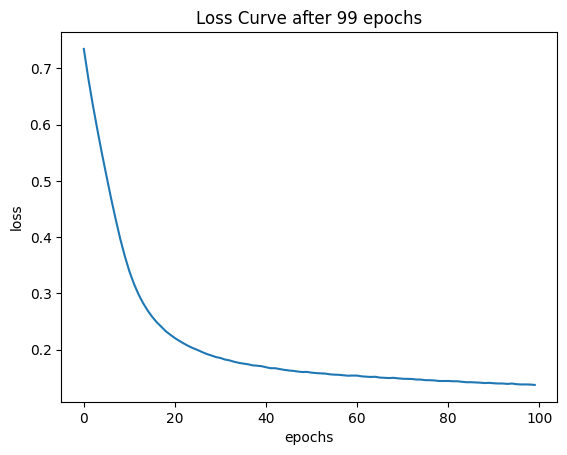

In [30]:
plt.plot(history.history['loss'])
plt.title(f"Loss Curve after {history.epoch[-1]} epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [36]:
import numpy as np

new_student = np.array([[
    3,    
    0,    
    5,    
    12,   
    11    
]])
new_student_scaled = scaler.transform(new_student)

prediction = model.predict(new_student_scaled)
probability_of_passing = prediction[0][0]

print(f"\nPrediction for new student:")
if probability_of_passing > 0.5:
    print(f"This student is likely to PASS with a {probability_of_passing*100:.2f}% probability.")
else:
    print(f"This student is at risk of FAILING with a {probability_of_passing*100:.2f}% probability of passing.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Prediction for new student:
This student is likely to PASS with a 99.24% probability.


d:\Rhodrick\Machine Learning\student perfomance\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
